# Pendahuluan
Modul ini bertujuan untuk memperkenalkan dan memandu pengguna dalam memanfaatkan model-model pre-trained yang tersedia di Hugging Face untuk berbagai use case, termasuk:

- Text Generator: Membangkitkan teks baru berdasarkan model bahasa seperti GPT-2, TinyLlama, dan Zephyr.
- Image Generator: Menghasilkan gambar baru dari teks deskripsi menggunakan model seperti Dreamlike.
- Image to Video Generator: Mengubah gambar statis menjadi gambar bergerak menggunakan model seperti Stable VIdeo Diffusion.

# Instruksi
1. Pastikan Anda telah memiliki akun Hugging Face dan menambahkan token ke Secrets pada Colab.
2. Jangan lupa ubah komputasi agar menggunakan GPU melalui menu `Runtime`->`Change Runtime Type`->`Hardware Acceleration`.
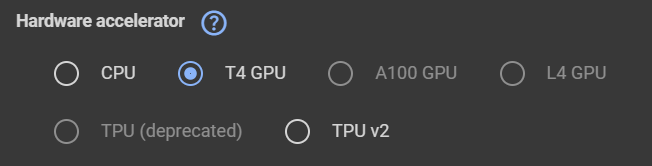

In [12]:
!pip -q install --upgrade transformers accelerate datasets evaluate diffusers
!pip -q install --upgrade -i https://pypi.org/simple/ bitsandbytes

In [2]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


# Text Generator - GPT2 - 124M Params

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Running on CPU
model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# prompt = "GPT2 is a model developed by OpenAI."
prompt = "Write me a function to calculate the first 10 digits of the fibonacci sequence in Python and print it out to the CLI!"

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]
print(gen_text)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Write me a function to calculate the first 10 digits of the fibonacci sequence in Python and print it out to the CLI!

[email protected]<|endoftext|>


#  Text Generator - TinyLlama - 1.1B Params

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Running on GPU
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

model = AutoModelForCausalLM.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

messages = [
    {"role": "user", "content": "Write me a function to calculate the first 10 digits of the fibonacci sequence in Python and print it out to the CLI!"},
]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=1000,
)
gen_text = tokenizer.batch_decode(gen_tokens[:, input_ids.shape[1]:], skip_special_tokens=True)[0]
print(gen_text)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

```python
def fibonacci(n):
    """
    Calculates the first n Fibonacci numbers.
    
    Parameters:
    n (int): The number of Fibonacci numbers to calculate.
    
    Returns:
    List[int]: The n Fibonacci numbers. Can be stored in a variable.
    """
    
    # Initialize the Fibonacci sequence with a starting value of 0 and 1
    fibonacci_sequence = [0, 1]
    
    # Calculate Fibonacci numbers from 2, since it's easier than the initial two
    for I in range(2, n+1):
        fibonacci_sequence.append(fibonacci_sequence[-1] + fibonacci_sequence[-2])
    
    # Print out the first n Fibonacci numbers
    print(f"First {n} Fibonacci numbers:")
    for I in range(0, n+1):
        print(f"{fibonacci_sequence[i]}.")
    
# Call the function with the desired value (10 in this case)
fibonacci(10)
```

Example usage:

```
$ python3 fibonacci.py 10
First 10 Fibonacci numbers:
0
1
1
2
3
5
8
13
21
34
```

Output:

```
$ python3 fibonacci.py 10
First 10 Fibonacci numbers:
0
1
1
2
3
5
8
13


#  Text Generator - Zephyr - 7B Params

*   List item
*   List item



In [5]:
# Clean up the GPU cache
del model
del tokenizer
torch.cuda.empty_cache()

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import BitsAndBytesConfig

model_name = "HuggingFaceH4/zephyr-7b-alpha"

quantization_config = BitsAndBytesConfig(
    load_in_8bit=True
)

model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=quantization_config, device_map=device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

messages = [
    {"role": "user", "content": "Write me a function to calculate the first 10 digits of the fibonacci sequence in Python and print it out to the CLI!"},
]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=1000,
)

gen_text = tokenizer.batch_decode(gen_tokens[:, input_ids.shape[1]:], skip_special_tokens=True)[0]
print(gen_text)

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1659: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


To calculate the first 10 digits of the Fibonacci sequence, you can use a loop to calculate the values and print each one as it is computed. Here's the Python code:

```python
def fibonacci(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        sequence = [0, 1]
        for i in range(2, n):
            sequence.append(sequence[i-1] + sequence[i-2])
        return sequence

# Calculate first 10 digits
sequence = fibonacci(10)
# Print out the sequence to the CLI
print("Fibonacci Sequence (first 10 digits):")
for i in range(len(sequence)):
    print(sequence[i])
```

This code defines the `fibonacci` function which generates the Fibonacci sequence given the desired number of digits (`n`). The function uses recursion to calculate the sequence, but for finding the first 10 digits, we're not using recursion.

Instead, we're calling `fibonacci` with an argument of 10, which generates the sequence up to 10, and the `se

# Text to Image - Dreamlike

In [4]:
# Clean up the GPU cache
del model
del tokenizer
torch.cuda.empty_cache()

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:25: FutureWarning

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


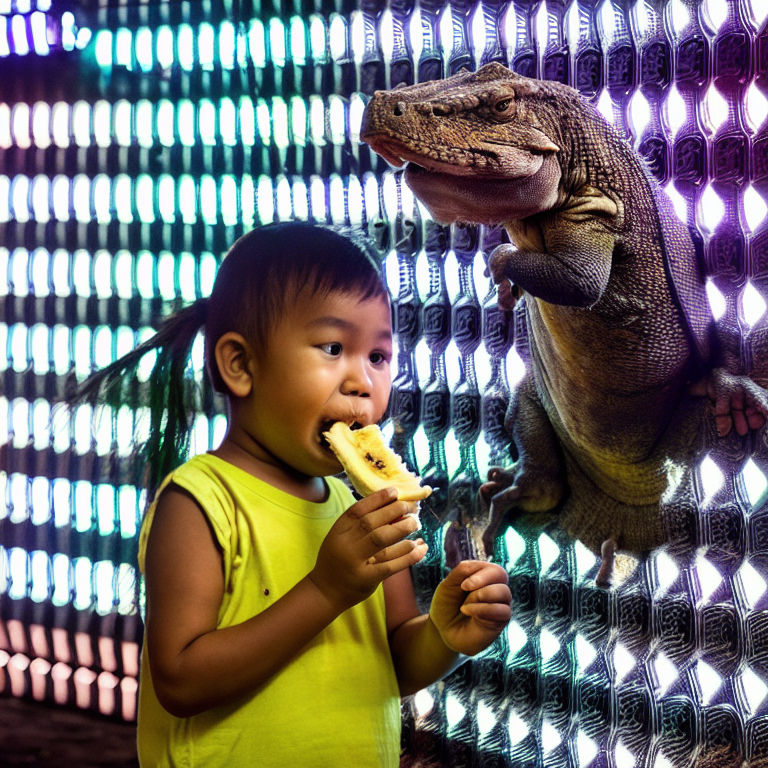

In [5]:
from diffusers import AutoPipelineForText2Image
import torch

model_name = "dreamlike-art/dreamlike-photoreal-2.0"

pipe_txt2img = AutoPipelineForText2Image.from_pretrained(model_name, torch_dtype=torch.float16, use_safetensors=True).to(device)

prompt = "LED Walls photo of Indonesia's Si Komo eating banana with a komodo in Jakarta"
generator = torch.Generator(device="cpu").manual_seed(37)
image = pipe_txt2img(prompt, generator=generator).images[0]
image

# Image to Video - stable-video-diffusion

In [6]:
import urllib, PIL
import numpy as np

telkom_hero_image_url = "https://telkomakses.co.id/upload/hero/Hero_230626_b91ff00b6f.jpg"
img_ids = np.array(PIL.Image.open(urllib.request.urlopen(telkom_hero_image_url)))
print(img_ids)
PIL.Image.fromarray(img_ids)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# Clean up the GPU cache
torch.cuda.empty_cache()

In [8]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

image_path = telkom_hero_image_url
model_name = "stabilityai/stable-video-diffusion-img2vid-xt"

pipeline = StableVideoDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16, variant="fp16").to(device)
pipeline.enable_model_cpu_offload()

image = load_image(image_path)
image = image.resize((1024, 576))

generator = torch.manual_seed(42)
frames = pipeline(image, decode_chunk_size=8, generator=generator).frames[0]
generated_video_filename = "generated_video.mp4"
export_to_video(frames, generated_video_filename, fps=7)

model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/984 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

'generated_video.mp4'

In [9]:
!ffmpeg -i generated_video.mp4 generated_video_fix.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [10]:
from IPython.display import Video
Video("generated_video_fix.mp4", width=500, embed=True)